In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('../analysis/cost_analysis/running_time/cost_running_time.csv',dtype={'Task': str})
# transfer Task to color
tasks = df['Task'].unique()
# create a color map
color_map = {"12 to 12": "red", "24 to 24": "blue", "96 to 96": "green", "384 to 384": "orange"}
# add additional column


In [3]:
# add a new column to the dataframe
df['Color'] = df['Task'].map(color_map)

In [4]:
df

,Task,Cost,Time,Color
0,12 to 12,12,70,red
1,12 to 12,12,61,red
2,12 to 12,12,70,red
3,12 to 12,70,281,red
4,12 to 12,70,286,red
5,12 to 12,72,277,red
6,12 to 12,107,454,red
7,12 to 12,112,481,red
8,12 to 12,115,490,red
9,12 to 12,138,594,red


/tmp/ipykernel_461935/1093000207.py:22: RuntimeWarning: divide by zero encountered in log10
  y = 10**p(np.log10(x))


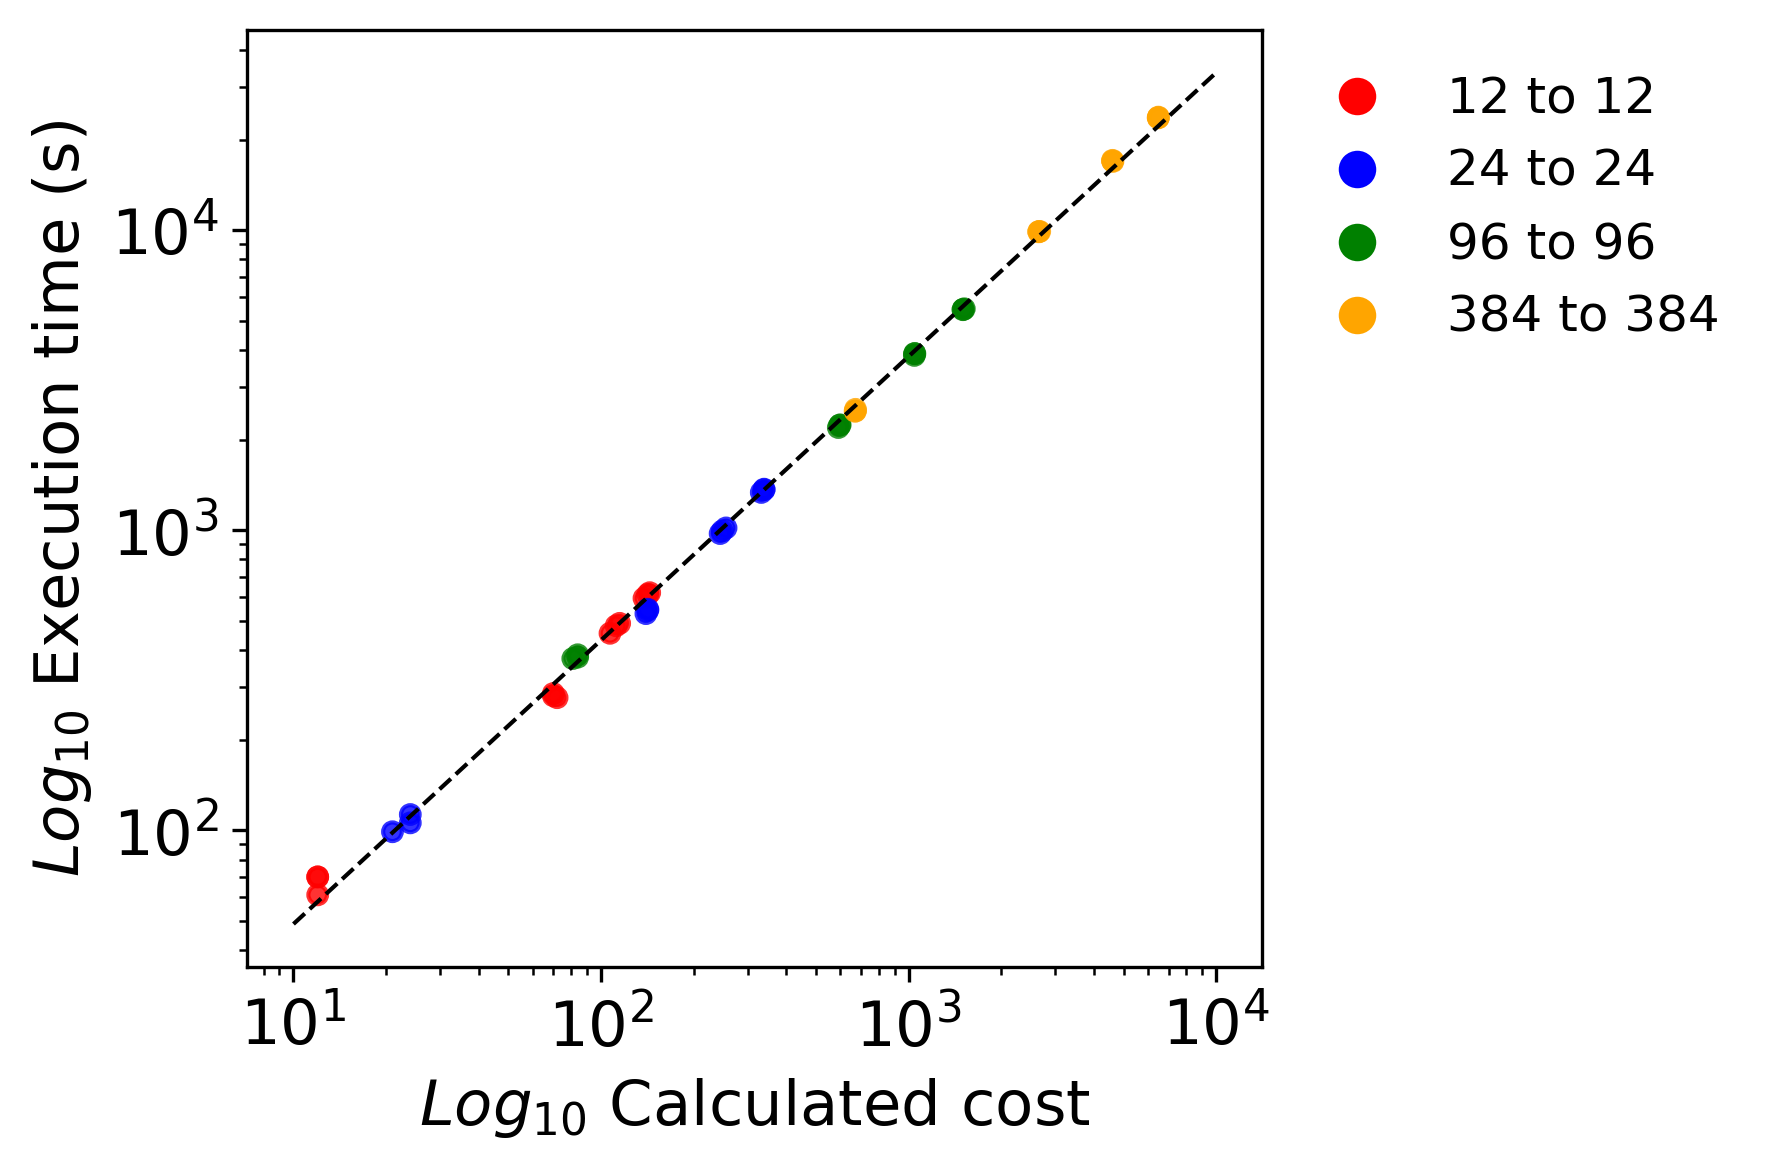

In [16]:
# plot Time and Cost, label the color of the dot with the Task which are strings
fig, ax = plt.subplots(figsize=(6, 4), dpi=300)

ax.scatter(df['Cost'], df['Time'], c=df['Color'], alpha=0.8,s=20)

#ax.set_title('Time vs Cost')
# add a legend
legend_labels = {task: color for task, color in color_map.items()}
handles = [plt.Line2D([0], [0], marker='o', color='w', label=task, markerfacecolor=color, markersize=10) for task, color in legend_labels.items()]
ax.legend(handles=handles,loc='upper left', bbox_to_anchor=(1, 1),frameon=False, fontsize=12)
# use log scale for y axis
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('$Log_{10}$ Calculated cost', fontsize=15)
ax.set_ylabel('$Log_{10}$ Execution time (s)', fontsize=15)
# set the ticks size
ax.tick_params(axis='both', which='major', labelsize=15)
# add a trend line
z = np.polyfit(np.log10(df['Cost']), np.log10(df['Time']), 1)
p = np.poly1d(z)
x = np.linspace(0, 10000, 1000)
y = 10**p(np.log10(x))
ax.plot(x, y, color='black', linewidth=1, linestyle='--')


# remove the frame of the label
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
# add a zoomed in plot
#axins = ax.inset_axes([0.15, 0.65, 0.3, 0.3])  # [x, y, width, height]
#axins.scatter(df['Cost'], df['Time'], c=df['Color'], alpha=0.8,s=15)
#axins.set_xlim(-50, 800)
#axins.set_ylim(-100, 3200)
#axins.set_xlabel('Calculated cost')
#axins.set_ylabel('Actual running time (s)')
# set the ticks spacing
#axins.xaxis.set_major_locator(plt.MaxNLocator(3))
#axins.yaxis.set_major_locator(plt.MaxNLocator(3))
#ax.indicate_inset_zoom(axins, edgecolor="black", linewidth=1.5)
plt.tight_layout()